In [1]:
import numpy as np
import pandas as pd
from spec_id import Likelihood_contours, Median_w_Error,Median_w_Error_cont, Gen_spec
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [12]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [26]:
galDB

,gids,ids,ra,dec,hi_res_specz,lmass,tau,Z_f,Z_-_sig_f,Z_+_sig_f,...,tx_+_sig_lwa,Zx_lwa,Zx_-_sig_lwa,Zx_+_sig_lwa,Z_lwa,Z_-_sig_lwa,Z_+_sig_lwa,t_lwa,t_-_sig_lwa,t_+_sig_lwa
43,n14713,14713,189.236333,62.214608,1.232,10.56,8.78,0.018,0.011,0.008,...,0.551102,0.015916,0.010156,0.009483,0.016,0.010,0.009,2.4,0.798,0.459
49,n16758,16758,189.162357,62.224840,1.014,10.83,0.00,0.020,0.001,0.002,...,0.242485,0.020068,0.001347,0.002862,0.021,0.002,0.002,4.9,0.498,0.207
50,n17070,17070,189.268086,62.226445,1.192,10.92,8.48,0.011,0.003,0.004,...,0.694389,0.010305,0.002581,0.004545,0.011,0.003,0.004,2.1,0.586,0.615
58,n19442,19442,189.123036,62.237460,1.101,10.10,8.90,0.015,0.009,0.010,...,1.003006,0.013896,0.008248,0.010661,0.014,0.008,0.011,2.5,0.876,0.976
61,n21156,21156,189.239409,62.247548,1.251,11.16,8.30,0.020,0.005,0.004,...,0.661323,0.019900,0.004489,0.004152,0.020,0.005,0.004,1.8,0.451,0.607
62,n21427,21427,189.368121,62.247344,1.514,10.73,8.48,0.019,0.010,0.007,...,0.573146,0.017936,0.008754,0.008248,0.018,0.009,0.008,2.1,0.707,0.549
69,n23435,23435,189.338306,62.256571,1.134,10.27,8.60,0.014,0.006,0.009,...,0.826653,0.014008,0.006172,0.009034,0.014,0.006,0.009,3.1,0.814,0.817
86,n32566,32566,189.161280,62.307577,1.150,10.61,8.70,0.020,0.008,0.006,...,0.705411,0.019507,0.007631,0.006958,0.020,0.008,0.006,1.8,0.782,0.651
96,n34694,34694,189.147840,62.323647,1.145,10.94,8.30,0.015,0.006,0.005,...,1.003006,0.014345,0.004938,0.005667,0.015,0.006,0.005,2.5,0.567,0.943
107,n37686,37686,189.274474,62.360820,1.258,10.89,8.48,0.016,0.003,0.004,...,0.551102,0.015355,0.002357,0.004321,0.016,0.003,0.004,3.1,0.561,0.475


In [8]:
% matplotlib inline
for i in galDB.index:
    P = np.load('../chidat/%s_dtau_tZ_pos_lwa.npy' % galDB['gids'][i])
    t,Pt = np.load('../chidat/%s_dtau_t_pos_lwa.npy' % galDB['gids'][i])
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % galDB['gids'][i])
    onesig,twosig = Likelihood_contours(age,metal,P)
    levels = np.array([twosig,onesig])
    ###PLOT
    gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
    plt.figure(figsize=[8,8])
    plt.subplot(gs[2])
    plt.contour(M,A,P,levels,colors='k',linewidths=2)
    plt.contourf(M,A,P,40,cmap=cmap)
    plt.axis([0,0.03,0,6])
    plt.xlabel('Metallicity (Z$_\odot$)',size=35)
    plt.ylabel('Average Age (Gyrs)',size=35)
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
    plt.subplot(gs[0])
    plt.plot(Z,PZ)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0,0.03)
    plt.ylim(0,max(PZ))
    plt.subplot(gs[3])
    plt.plot(Pt,t)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0,6)
    plt.xlim(0,max(Pt))
    plt.savefig('../plots/LHS/%s_lh_lwa.png' % galDB['gids'][i])
    plt.close()
    
    P = np.load('../chidat/%s_dtau_tZ_pos_ff.npy' % galDB['gids'][i])
    t,Pt = np.load('../chidat/%s_dtau_t_pos_ff.npy' % galDB['gids'][i])
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_ff.npy' % galDB['gids'][i])
    onesig,twosig = Likelihood_contours(age,metal,P)
    levels = np.array([twosig,onesig])
    ###PLOT
    gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
    plt.figure(figsize=[8,8])
    plt.subplot(gs[2])
    plt.contour(M,A,P,levels,colors='k',linewidths=2)
    plt.contourf(M,A,P,40,cmap=cmap)
    plt.axis([0,0.03,0,6])
    plt.xlabel('Metallicity (Z$_\odot$)',size=35)
    plt.ylabel('Average Age (Gyrs)',size=35)
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
    plt.subplot(gs[0])
    plt.plot(Z,PZ)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0,0.03)
    plt.ylim(0,max(PZ))
    plt.subplot(gs[3])
    plt.plot(Pt,t)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0,6)
    plt.xlim(0,max(Pt))
    plt.savefig('../plots/LHS/%s_lh_dtau.png' % galDB['gids'][i])
    plt.close()

In [35]:
med = np.zeros(len(galDB.index))
lerr = np.zeros(len(galDB.index))
herr = np.zeros(len(galDB.index))


for i in range(len(galDB.index)):
    t, Pt = np.load('../chidat/%s_t_pos.npy' % galDB['gids'][galDB.index[i]])
    med[i],lerr[i],herr[i] = Median_w_Error(Pt,t)

In [46]:
galDB['t_+_sig'] = herr

In [48]:
galDB

,gids,ids,ra,dec,hi_res_specz,Z,Z_-_sig,Z_+_sig,t,t_-_sig,t_+_sig
43,n14713,14713,189.236333,62.214608,1.232,0.019,0.012,0.008,3.1,0.903,0.541
49,n16758,16758,189.162357,62.224840,1.014,0.021,0.002,0.002,5.5,0.470,0.125
50,n17070,17070,189.268086,62.226445,1.192,0.017,0.007,0.006,2.5,0.732,0.998
58,n19442,19442,189.123036,62.237460,1.101,0.015,0.010,0.010,2.9,1.033,0.818
61,n21156,21156,189.239409,62.247548,1.251,0.015,0.005,0.006,2.6,0.524,0.622
62,n21427,21427,189.368121,62.247344,1.514,0.020,0.009,0.007,2.8,0.779,0.533
69,n23435,23435,189.338306,62.256571,1.134,0.015,0.007,0.008,3.7,0.907,0.779
86,n32566,32566,189.161280,62.307577,1.150,0.020,0.008,0.007,2.7,1.054,0.919
96,n34694,34694,189.147840,62.323647,1.145,0.014,0.005,0.006,3.1,0.671,1.048
107,n37686,37686,189.274474,62.360820,1.258,0.016,0.003,0.003,3.6,0.598,0.548


In [27]:
pd.to_pickle(galDB,'../data/sgal_param_DB.pkl')

In [11]:
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
mzDB = mzDB.query('ids != 14713 and ids != 38126')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

In [13]:
mzDB

,gids,ids,ra,dec,hi_res_specz,Z,Z_-_sig,Z_+_sig,t,t_-_sig,t_+_sig,lmass,tau
50,n17070,17070,189.268086,62.226445,1.192,0.017,0.007,0.006,2.5,0.732,0.998,10.92,8.60
61,n21156,21156,189.239409,62.247548,1.251,0.015,0.005,0.006,2.6,0.524,0.622,11.16,8.30
107,n37686,37686,189.274474,62.360820,1.258,0.016,0.003,0.003,3.6,0.598,0.548,10.89,8.60
212,s35774,35774,53.158775,-27.742385,1.223,0.009,0.004,0.011,3.5,1.446,0.803,10.86,8.60
217,s38785,38785,53.168249,-27.727300,1.175,0.014,0.009,0.008,3.3,1.081,0.738,10.88,8.78
225,s39805,39805,53.163237,-27.724724,1.242,0.022,0.011,0.006,2.9,0.967,0.554,10.62,8.78
228,s40476,40476,53.108262,-27.721924,1.212,0.007,0.003,0.006,2.9,0.769,0.675,10.59,8.60
230,s40597,40597,53.148451,-27.719472,1.221,0.026,0.006,0.003,3.6,0.477,0.174,11.01,8.90


In [13]:
%matplotlib inline
Pl,Pm,Ph,Puh = np.ones([4,len(metal)])

for i in lzDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_ff.npy' % lzDB['gids'][i])
    Pl = Pl * PZ
    
for i in mzDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_ff.npy' % mzDB['gids'][i])
    Pm = Pm * PZ
    
for i in hzDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_ff.npy' % hzDB['gids'][i])
    Ph = Ph * PZ
    
for i in uhzDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_ff.npy' % uhzDB['gids'][i])
    Puh = Puh * PZ
    
Pl /= np.trapz(Pl,metal)
Pm /= np.trapz(Pm,metal)
Ph /= np.trapz(Ph,metal)
Puh /= np.trapz(Puh,metal)

Pl8,Pm8,Ph8,Puh8 = np.ones([4,len(metal)])

for i in lzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % lzDB['gids'][i])
    Pl8 = Pl8 * PZ
    
for i in mzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % mzDB['gids'][i])
    Pm8 = Pm8 * PZ
    
for i in hzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % hzDB['gids'][i])
    Ph8 = Ph8 * PZ
    
for i in uhzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_Z_pos_ff.npy' % uhzDB['gids'][i])
    Puh8 = Puh8 * PZ
    
Pl8 /= np.trapz(Pl8,metal)
Pm8 /= np.trapz(Pm8,metal)
Ph8 /= np.trapz(Ph8,metal)
Puh8 /= np.trapz(Puh8,metal)

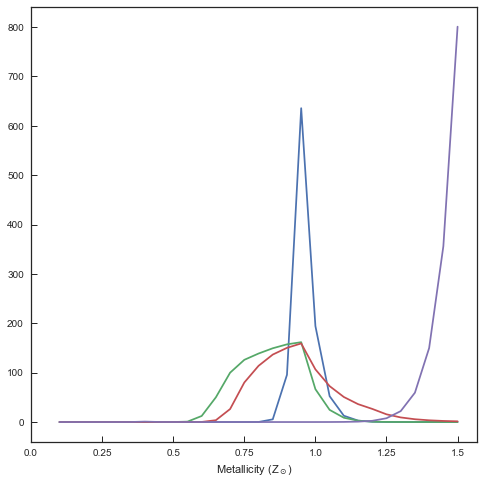

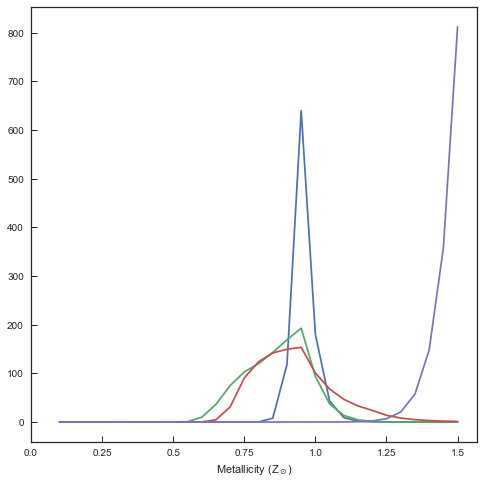

In [14]:
plt.figure(figsize=[8,8])
plt.plot(metal,Pl)
plt.plot(metal,Pm)
plt.plot(metal,Ph)
plt.plot(metal,Puh)
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.xlabel('Metallicity (Z$_\odot$)')
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(metal,Pl8)
plt.plot(metal,Pm8)
plt.plot(metal,Ph8)
plt.plot(metal,Puh8)
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.xlabel('Metallicity (Z$_\odot$)')
plt.show()
plt.close()

In [16]:
%matplotlib inline
Pl,Pm,Ph,Puh = np.ones([4,len(age)])

for i in lzDB.index:
    t,Pt = np.load('../chidat/%s_dtau_t_pos_ff.npy' % lzDB['gids'][i])
    Pl = Pl * Pt
    
for i in mzDB.index:
    t,Pt = np.load('../chidat/%s_dtau_t_pos_ff.npy' % mzDB['gids'][i])
    Pm = Pm * Pt
    
for i in hzDB.index:
    t,Pt = np.load('../chidat/%s_dtau_t_pos_ff.npy' % hzDB['gids'][i])
    Ph = Ph * Pt
    
for i in uhzDB.index:
    t,Pt = np.load('../chidat/%s_dtau_t_pos_ff.npy' % uhzDB['gids'][i])
    Puh = Puh * Pt
    
Pl /= np.trapz(Pl,age)
Pm /= np.trapz(Pm,age)
Ph /= np.trapz(Ph,age)
Puh /= np.trapz(Puh,age)

Pl8,Pm8,Ph8,Puh8 = np.ones([4,len(age)])

for i in lzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_t_pos_ff.npy' % lzDB['gids'][i])
    Pl8 = Pl8 * PZ
    
for i in mzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_t_pos_ff.npy' % mzDB['gids'][i])
    Pm8 = Pm8 * PZ
    
for i in hzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_t_pos_ff.npy' % hzDB['gids'][i])
    Ph8 = Ph8 * PZ
    
for i in uhzDB.index:
    Z,PZ = np.load('../chidat/%s_79-114_t_pos_ff.npy' % uhzDB['gids'][i])
    Puh8 = Puh8 * PZ
    
Pl8 /= np.trapz(Pl8,age)
Pm8 /= np.trapz(Pm8,age)
Ph8 /= np.trapz(Ph8,age)
Puh8 /= np.trapz(Puh8,age)

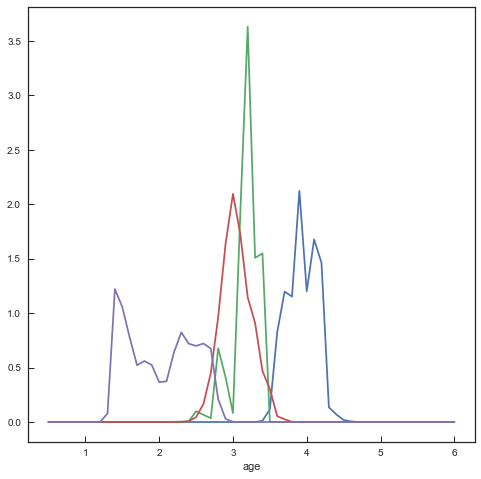

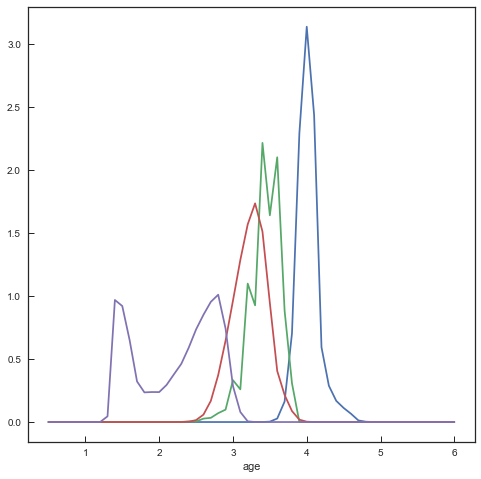

In [17]:
plt.figure(figsize=[8,8])
plt.plot(age,Pl)
plt.plot(age,Pm)
plt.plot(age,Ph)
plt.plot(age,Puh)
plt.xlabel('age')
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(age,Pl8)
plt.plot(age,Pm8)
plt.plot(age,Ph8)
plt.plot(age,Puh8)
plt.xlabel('age')
plt.show()
plt.close()

In [24]:
meds = []
mlerr = []
mherr = []
for i in galDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_t_pos_lwa_2.npy' % galDB['gids'][i])
    mds,ml,mh = Median_w_Error_cont(PZ,Z)
    meds.append(mds)
    mlerr.append(ml)
    mherr.append(mh)

In [25]:
galDB['tx_lwa']=meds
galDB['tx_-_sig_lwa']=mlerr
galDB['tx_+_sig_lwa']=mherr

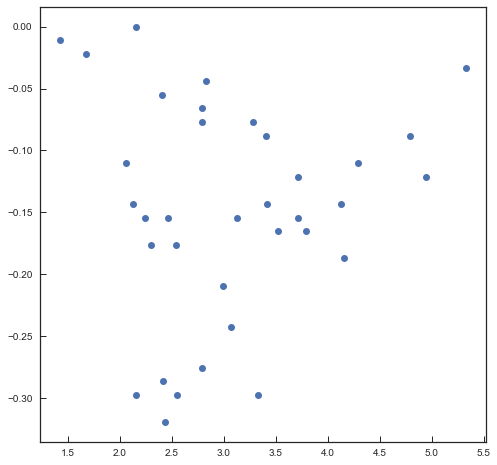

In [58]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(galDB['tx_dt'],galDB['tx_dt'] - galDB['tx_f'],'o')